# Basic Testing

In [10]:
%load_ext autoreload
%autoreload 2

from netCDF4 import Dataset
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.ndimage import gaussian_filter1d
from scipy import signal
from sklearn.cluster import KMeans
from settings import path_data
from plot_map import plot_map
from smoothing import smooth_butter

In [3]:
ds_solar = xr.open_dataset(path_data / 'Solar_forcing_1st_mill.nc')
ds_volc = xr.open_dataset(path_data / 'Volc_Forc_AOD_1st_mill.nc')
ds_temp_r1 = xr.open_dataset(path_data / 'T2m_R1_ym_1stMill.nc')
ds_temp_r2 = xr.open_dataset(path_data / 'T2m_R2_ym_1stMill.nc')

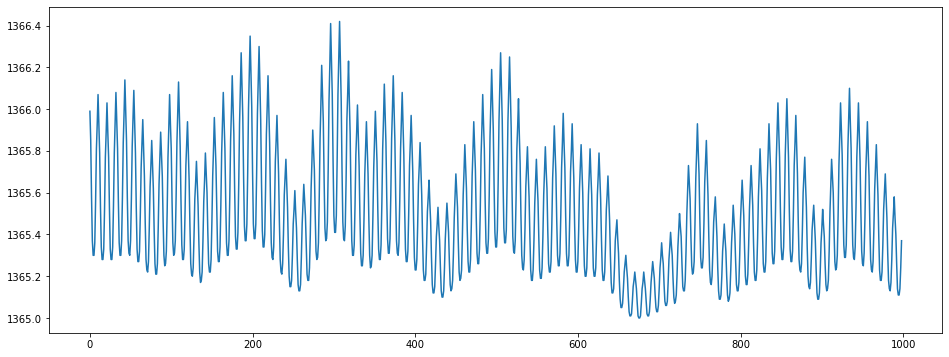

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(16, 6))
ax.plot(ds_solar.TSI.values.flatten());

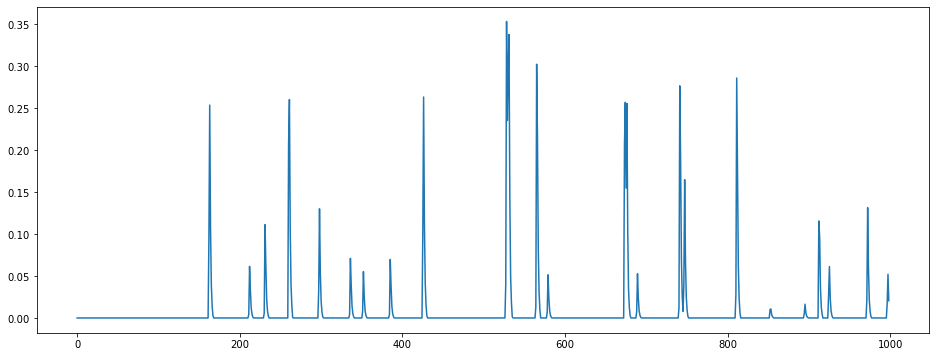

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(16, 6))
ax.plot(ds_volc.AOD.values.flatten())

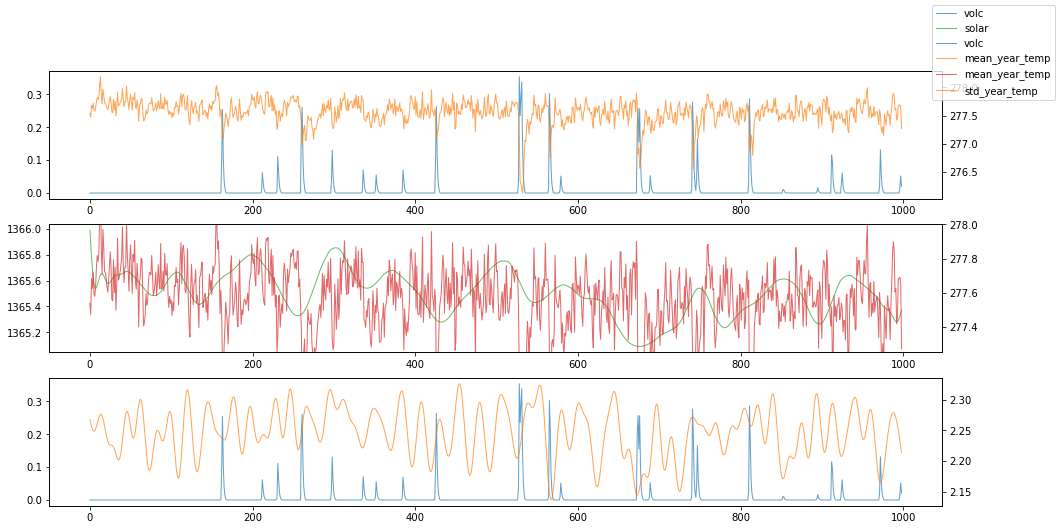

In [14]:
mean_year_temp = np.mean(np.mean(ds_temp_r1.T2m.values, axis=1), axis=1)
std_year_temp = smooth_butter(np.std(np.std(ds_temp_r1.T2m.values, axis=1), axis=1))
#mean_year_temp = smooth_butter(mean_year_temp)

aod = ds_volc.AOD.values.flatten()

solar = ds_solar.TSI.values.flatten()
solar = smooth_butter(solar)

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(16, 8))

ax1.plot(aod, label='volc', linewidth=1, alpha=0.7)
ax1_twin = ax1.twinx()
ax1_twin.plot(mean_year_temp, color='C1', label='mean_year_temp', linewidth=1, alpha=0.7)

ax2.plot(solar, label='solar', color='C2', linewidth=1, alpha=0.7)
ax2_twin = ax2.twinx()
ax2_twin.plot(mean_year_temp, color='C3', label='mean_year_temp', linewidth=1, alpha=0.7)
ax2_twin.set_ylim([277.25, 278])

ax3.plot(aod, label='volc', linewidth=1, alpha=0.7)
ax3_twin = ax3.twinx()
ax3_twin.plot(std_year_temp, color='C1', label='std_year_temp', linewidth=1, alpha=0.7)

fig.legend();

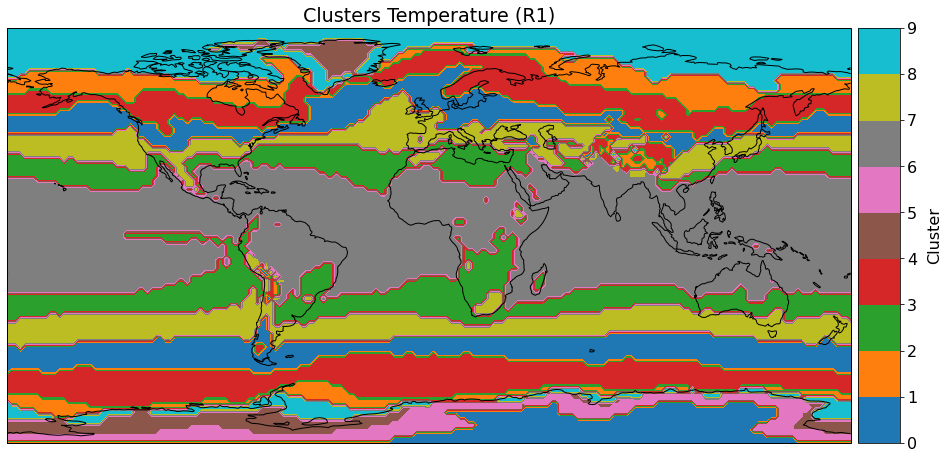

In [15]:
temp = ds_temp_r1['T2m'].values.copy()
X = temp.reshape(999, -1).transpose()
kmeans = KMeans(n_clusters=10, random_state=0).fit(X)
clusters = kmeans.labels_.reshape(96, 192)
plot_map(clusters, title='Clusters Temperature (R1)', colorbar_title='Cluster')

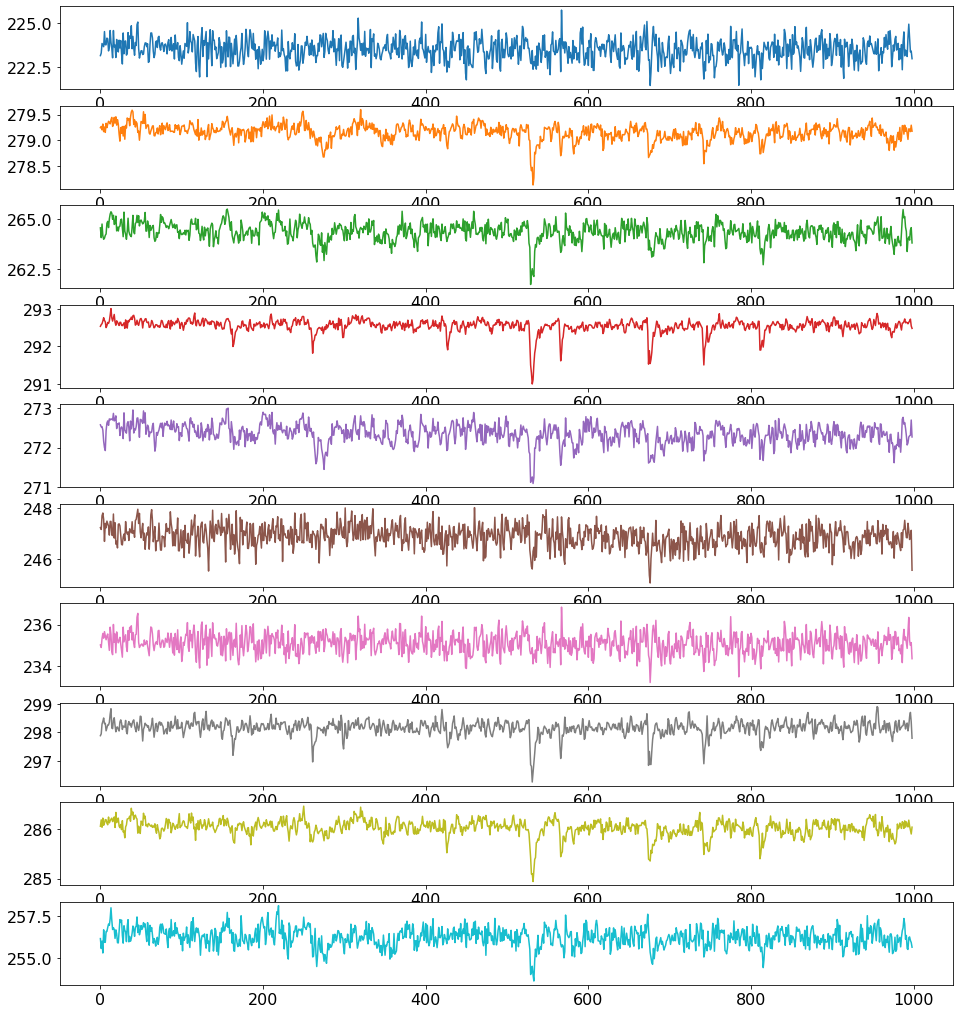

In [17]:
mean_temp_clusters = []
for c in np.unique(clusters):
    temps_cluster = ds_temp_r1['T2m'].values[:, clusters == c]
    temps_cluster = np.mean(temps_cluster, axis=1)
    mean_temp_clusters.append(temps_cluster)

fig, axes = plt.subplots(10, 1, figsize=(16, 18))
for i, ax in enumerate(axes.flatten()):
    ax.plot(mean_temp_clusters[i], color=cm.tab10((i+0.5)/10))